<a href="https://colab.research.google.com/github/zhouchun0105/Fake-News-Detection-Project-BA865/blob/main/FINAL_NOTEBOOK_BA865_Fake_News_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<marquee style='width: 40%; color: blue;'><b>Welcome to exploring Fake News Classification!</b></marquee>

# **BA865 - Introduction to Neural Networks**
## Group Project

*Alex von Schwerdtner, Subhiksha Sivasubramanian, Chun Zhou, Geech Hor*

<img src="https://github.com/zhouchun0105/Fake-News-Detection-Project-BA865/blob/main/Fake_News.png?raw=true" width="800" align="center"/>



*Image from [Boston University College of Communication](https://sites.bu.edu/cmcs/2018/11/26/fake-news-social-media-and-politics/)

---
# **Fake News Classification**
---

### *Executive Summary*
*Fake News* is false or misleading information presented as news. Fake news often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. The prevalence of fake news has increased with the rise of social media. Fake news can reduce the impact of real news by competing with it and makes it harder for people to see the truth and can be harmful to your health. Scientists have dedicated efforts to apply AI techniques to aid detecting and removing fake news.

### *Problem definition:*

Is the news that we read day to day on different digital platforms true every time?

We would like to use deep learning techniques and AI to automate the detection of Fake News by creating a neural network algorithm and machine learning models to classify and remove false news from companies' platforms. 

## **Data**

The Data was downloaded from [ISOT Fake News Dataset]('https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php?utm_medium=redirect&utm_source=/engineering/ece/isot/datasets/fake-news/index.php&utm_campaign=redirect-usage')


Each row represents a real or fake news article including: the subject of the article and the date the article was published.

* **XXX**: XXX
* **XXX**: XXX
* **XXX**: XXX

*We will be using Matplotlib, Seaborn, XXXXXXXX and XXX to plot and analyze the data as well as training our Neural Network Models.*

---
## **Basic information of Datasets used**:

*Real News Dataset*
* contains 21417  articles from reuter.com.

*Fake News Dataset*
* contains 23,481  articles from different fake news outlet sources. 

## Content
---

1.  **Importing Libraries**
2.  **Setup, Data Cleaning & Data Pre-Processing**
3.  **Exploratory Data Analysis**
4.   **Neural Networks**
*   *Embedding using stemming*
*   *Embedding using Text vectorization*
*   *Multi Input Embedding*
* *Shaply (feature importance)*
5.   **Conclusion**
---


# **1. Import libraries**

In [1]:
# Importing all necessary libraries and imports

# Basics
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import pandas as pd
from collections import Counter
embeddings_dictionary = dict()

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.utils.vis_utils import plot_model


# sklearn
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


# NLTK 
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


try:
    from scikeras.wrappers import KerasRegressor                     
except ImportError:
    !pip install scikeras
    from scikeras.wrappers import KerasRegressor

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.2
    Uninstalling importlib-metadata-4.11.2:
      Successfully uninstalled importlib-metadata-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


# **2. Setup, Data Cleaning & Pre-Processing**

In [2]:
# Mounting Google Drive locally
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Import data 
df_fakenews_true = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/True.csv")
df_fakenews_fake = pd.read_csv("gdrive/Shared drives/BA865 Group Project/News _dataset/Fake.csv")

In [4]:
df_fakenews_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fakenews_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_fakenews_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
df_fakenews_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
print(df_fakenews_true.shape)
print(df_fakenews_fake.shape)

(21417, 4)
(23481, 4)


In [9]:
# checking for any null values
df_fakenews_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
# checking for any null values
df_fakenews_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## 2.1 Data Pre-Processing

In [11]:
# creating new colum 'Real/Fake', labeling the two datasets in order to merge and know which observation is real and which one is false
df_fakenews_true['real/fake'] = '1'
df_fakenews_fake['real/fake'] = '0'

In [12]:
# merging the two datasets
frames = [df_fakenews_true, df_fakenews_fake]
news_data_all = pd.concat(frames)

In [13]:
# Removing all links and the headline from the date column
news_data_all = news_data_all[news_data_all.date.str.contains('Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec')]

In [14]:
# Converting the Date Column to a different Datetime format for our EDA
news_data_all['date'] = pd.to_datetime(news_data_all['date']).dt.date

In [15]:
news_data_all.head()

,title,text,subject,date,real/fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,2017-12-31,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,2017-12-29,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,2017-12-31,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,2017-12-30,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,2017-12-29,1


In [16]:
# Keeping the subject column in the 'news_data_all' dataframe for EDA before dropping
news_data = news_data_all

In [17]:
# merging the title and news text
news_data['content'] = news_data['title']+' '+news_data['text']
news_dataset = news_data[['real/fake', 'date', 'content', 'title', 'text']]

In [18]:
# casting the label column as an integer
news_dataset['real/fake'] = news_dataset['real/fake'].astype(int)

In [19]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   real/fake  44888 non-null  int64 
 1   date       44888 non-null  object
 2   content    44888 non-null  object
 3   title      44888 non-null  object
 4   text       44888 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## 2.2 Text Pre-Processing

In [20]:
# looking at the real news articles and seeing 'Reuters' tag
print(df_fakenews_true.loc[df_fakenews_true.text.str.contains('Reuters')].count()/df_fakenews_true.count())
print(df_fakenews_fake.loc[df_fakenews_fake.text.str.contains('Reuters')].count()/df_fakenews_fake.count())

title        0.998179
text         0.998179
subject      0.998179
date         0.998179
real/fake    0.998179
dtype: float64
title        0.013245
text         0.013245
subject      0.013245
date         0.013245
real/fake    0.013245
dtype: float64


### *2.2.1 Text Cleaning Function*

In [21]:
# defining a cleaning function for text
def review_cleaning(text):
    '''making text lowercase, extracting 'reuters' tag from articles, removing text in square brackets,
    removiing all links, removing punctuation and removing words containing numbers.'''
    text = str(text).lower()
    text = re.sub('reuters', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

Applying the text cleaning function

In [22]:
# creating a copy 
clean_news = news_dataset.copy()

# applying the cleaning function to the content, title and text columns
clean_news['content'] = clean_news['content'].apply(lambda x:review_cleaning(x))
clean_news['title'] = clean_news['title'].apply(lambda x:review_cleaning(x))
clean_news['text'] = clean_news['text'].apply(lambda x:review_cleaning(x))
clean_news.head()

,real/fake,date,content,title,text
0,1,2017-12-31,as us budget fight looms republicans flip thei...,as us budget fight looms republicans flip thei...,washington the head of a conservative republ...
1,1,2017-12-29,us military to accept transgender recruits on ...,us military to accept transgender recruits on ...,washington transgender people will be allowe...
2,1,2017-12-31,senior us republican senator let mr mueller do...,senior us republican senator let mr mueller do...,washington the special counsel investigation...
3,1,2017-12-30,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,washington trump campaign adviser george pap...
4,1,2017-12-29,trump wants postal service to charge much more...,trump wants postal service to charge much more...,seattlewashington president donald trump cal...


### *2.2.2 Stop words*

In [23]:
# downloading stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
# removing english stopwords to save space and processing time
stop = stopwords.words('english')
clean_news['content'] = clean_news['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news['title'] = clean_news['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news['text'] = clean_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,real/fake,date,content,title,text
0,1,2017-12-31,us budget fight looms republicans flip fiscal ...,us budget fight looms republicans flip fiscal ...,washington head conservative republican factio...
1,1,2017-12-29,us military accept transgender recruits monday...,us military accept transgender recruits monday...,washington transgender people allowed first ti...
2,1,2017-12-31,senior us republican senator let mr mueller jo...,senior us republican senator let mr mueller job,washington special counsel investigation links...
3,1,2017-12-30,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...,washington trump campaign adviser george papad...
4,1,2017-12-29,trump wants postal service charge much amazon ...,trump wants postal service charge much amazon ...,seattlewashington president donald trump calle...


In [25]:
clean_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   real/fake  44888 non-null  int64 
 1   date       44888 non-null  object
 2   content    44888 non-null  object
 3   title      44888 non-null  object
 4   text       44888 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


## 2.3 Shuffling data

In [26]:
# shuffling the cleaned dataset
clean_news = clean_news.sample(frac=1).reset_index(drop=True)

shuffled_indices = np.arange(clean_news.shape[0])

In [27]:
clean_news.head(10)

,real/fake,date,content,title,text
0,0,2016-05-16,democrats spending millions destroy trump ads ...,democrats spending millions destroy trump ads ...,democrats days away launching multimillion dol...
1,1,2016-05-16,us house weigh million new zika funding washin...,us house weigh million new zika funding,washington republicans us house representative...
2,1,2017-09-11,saudi arabia says foils islamic state bomb for...,saudi arabia says foils islamic state bomb for...,dubai saudi arabia said tuesday foiled islamic...
3,0,2017-08-17,failed gop presidential candidates join soros ...,failed gop presidential candidates join soros ...,james bond nemesis auric goldfinger famously o...
4,1,2016-02-13,senate leader mcconnell says wait replacing sc...,senate leader mcconnell says wait replacing sc...,washington republican senate majority leader m...
5,1,2017-11-30,trumps gulf policies impulsive dangerous irani...,trumps gulf policies impulsive dangerous irani...,rome us president donald trump policies gulf d...
6,1,2016-11-10,obamatrump meeting less awkward might expected...,obamatrump meeting less awkward might expected...,washington us president barack obama’s oval of...
7,0,2017-03-02,breaking republican house intel chair threaten...,breaking republican house intel chair threaten...,something going right within government concer...
8,0,2015-06-15,busted ultimate communist organizer…evidence s...,busted ultimate communist organizer…evidence s...,george barack hillary axis evil professional r...
9,0,2016-01-12,oregon judge sticks ammon bundy plans charge d...,oregon judge sticks ammon bundy plans charge d...,oregon judge enough hillbilly bundy militia sa...


# **3. Exploratory Data Analysis**

Using word cloud, we can explore the most used words that are found in both the fake news and real news dataset. For fake news dataset, 

We can see that there are alot of overlapping content in both the articles. 

(-0.5, 1299.5, 949.5, -0.5)

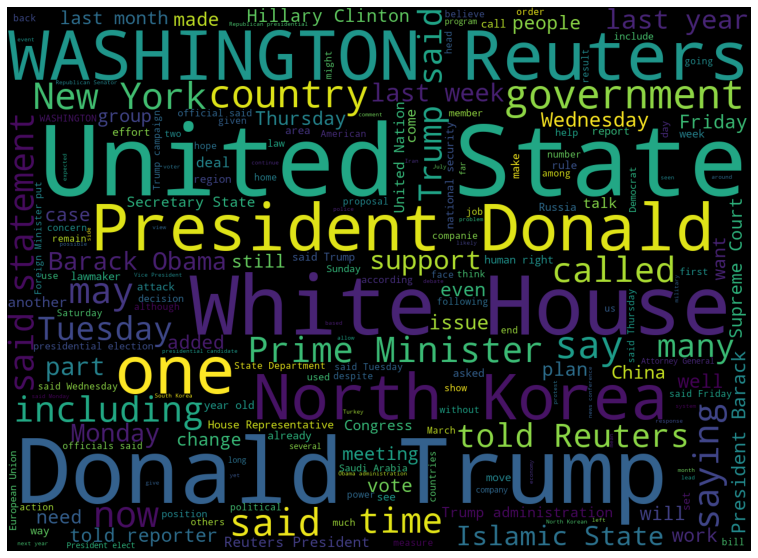

In [ ]:
# word cloud for the text real true News
text_true = pd.Series(df_fakenews_true['text'].tolist()).astype(str)

cloud = WordCloud(width=1300, height=950).generate(" ".join(text_true.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1299.5, 949.5, -0.5)

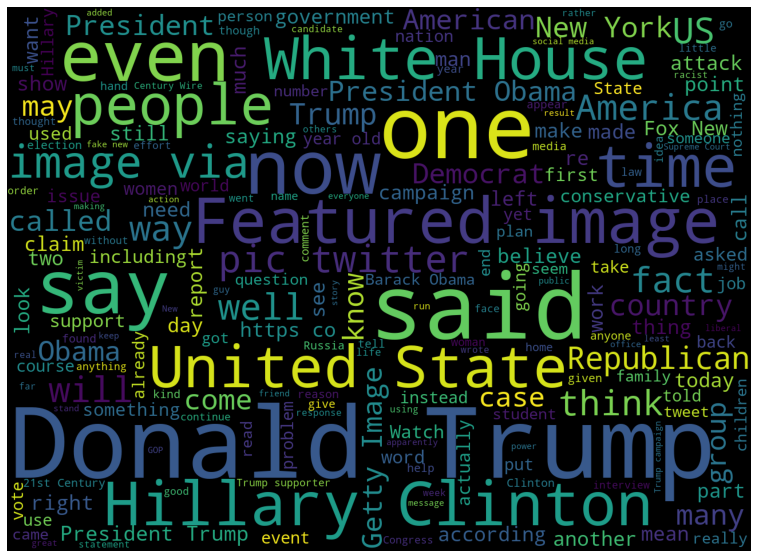

In [ ]:
# word cloud for the text false fake News
text_false = pd.Series(df_fakenews_fake['text'].tolist()).astype(str)

cloud = WordCloud(width=1300, height=950).generate(" ".join(text_false.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
# subsetting the cleaned, preprocessed news data for real and fake
top_words = clean_news.copy()
top_words_real = top_words[top_words['real/fake'] == 1]
top_words_fake = top_words[top_words['real/fake'] == 0]

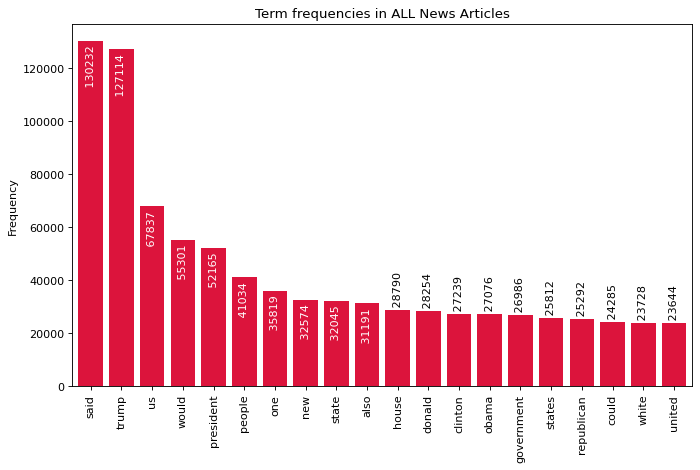

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

cn = Counter(" ".join(top_words['content']).split())

y = [count for tag, count in cn.most_common(20)]
x = [tag for tag, count in cn.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("Term frequencies in ALL News Articles")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(cn.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
#plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

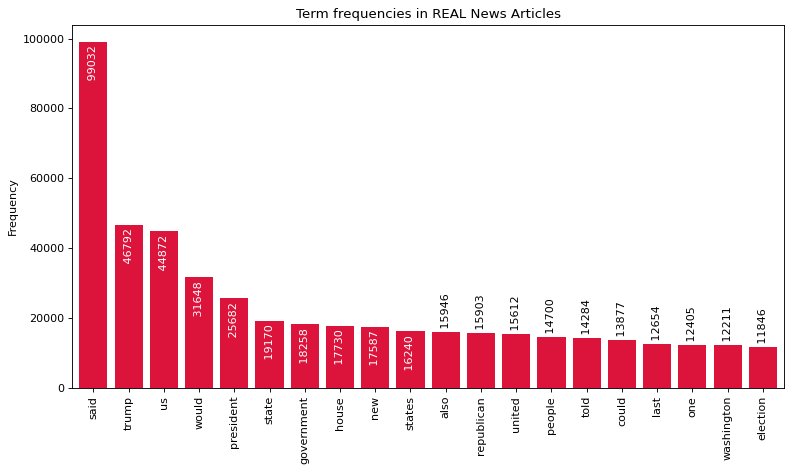

In [ ]:
figure(figsize=(10, 6), dpi=80)

cn = Counter(" ".join(top_words_real['content']).split())

y = [count for tag, count in cn.most_common(20)]
x = [tag for tag, count in cn.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("Term frequencies in REAL News Articles")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(cn.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

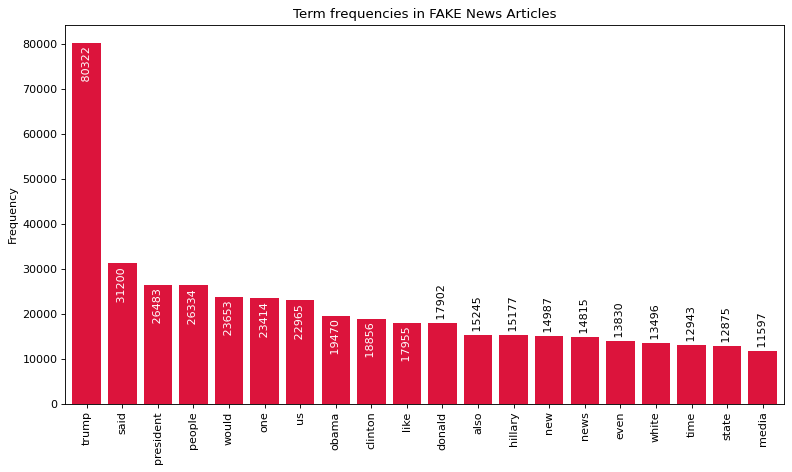

In [ ]:
figure(figsize=(10, 6), dpi=80)

cn = Counter(" ".join(top_words_fake['content']).split())

y = [count for tag, count in cn.most_common(20)]
x = [tag for tag, count in cn.most_common(20)]

plt.bar(x, y, color='crimson')
plt.title("Term frequencies in FAKE News Articles")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(cn.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

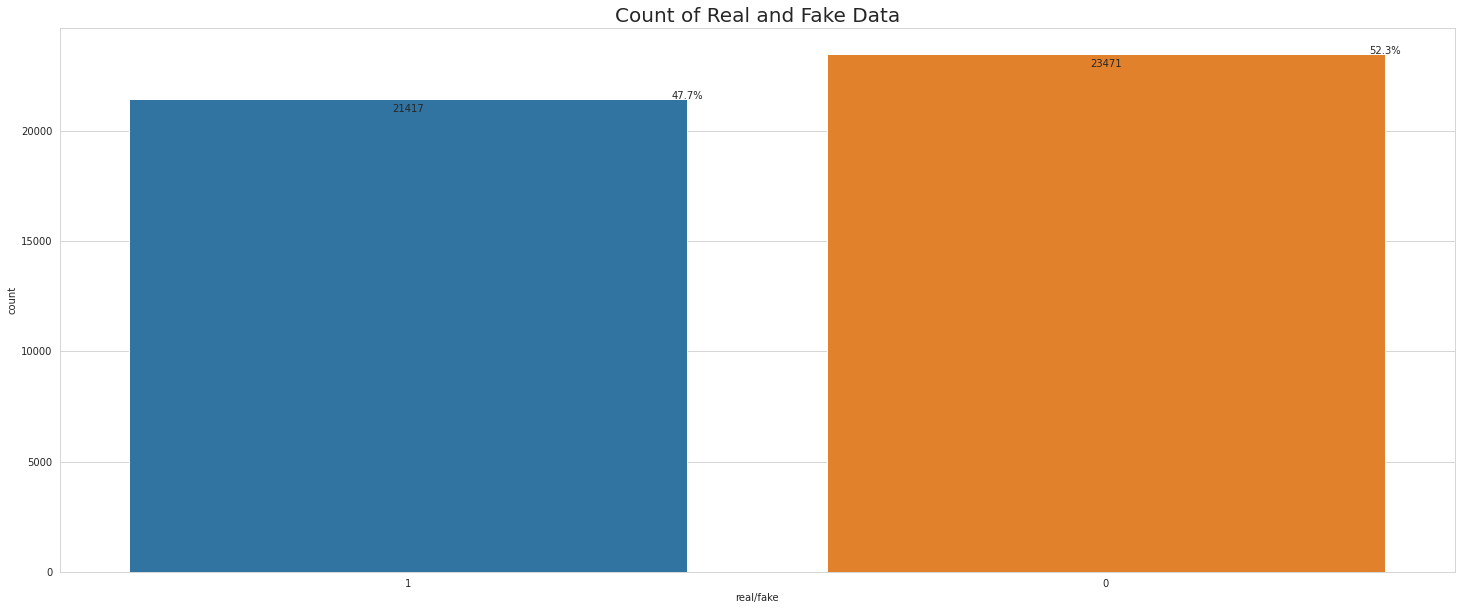

In [ ]:
total = float(len(news_data))

sns.set_style('whitegrid')
plt.figure(figsize= (25,10))
fig = sns.countplot(x='real/fake', data= news_data)
plt.title('Count of Real and Fake Data', fontsize=20)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='center')

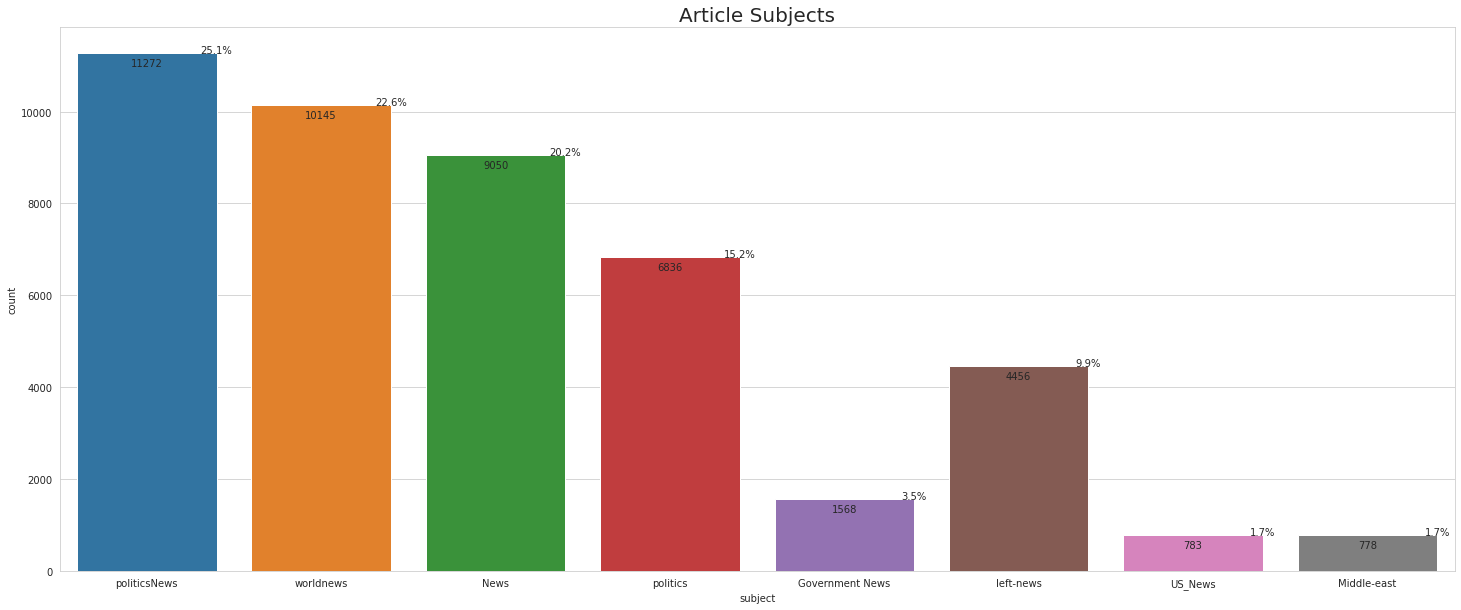

In [ ]:
#order=['unknown','Activated','Pending Activation','Inactivated','Non Standard MyChart Status','Patient Declined','Activation Code Generated, but Disabled']
total = float(len(news_data))


plt.figure(figsize= (25,10))
fig = sns.countplot(x='subject', data= news_data_all)
plt.title('Article Subjects', fontsize=20)
for p in fig.patches:
    fig.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    fig.annotate(percentage, (x, y),ha='center')


In [ ]:
count = news_data_all.groupby(['subject','real/fake']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
count

,subject,real/fake,count
0,politicsNews,1,11272
1,worldnews,1,10145
2,News,0,9050
3,politics,0,6836
4,left-news,0,4456
5,Government News,0,1568
6,US_News,0,783
7,Middle-east,0,778


In [ ]:
df_fakenews_true.groupby(['subject']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()

,subject,count
0,politicsNews,11272
1,worldnews,10145


In [ ]:
df_fakenews_fake.groupby(['subject']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()

,subject,count
0,News,9050
1,politics,6841
2,left-news,4459
3,Government News,1570
4,US_News,783
5,Middle-east,778


Time Serires Real/Fake News

In [ ]:
# looking at the publication date timespan of all articles
print(news_data_all['date'].min())
print(news_data_all['date'].max())

2015-03-31
2018-02-19


In [ ]:
df = news_data.groupby(['real/fake','date']).size().to_frame('count').reset_index()

In [ ]:
df.head()

,real/fake,date,count
0,0,2015-03-31,8
1,0,2015-04-01,2
2,0,2015-04-02,1
3,0,2015-04-04,5
4,0,2015-04-05,13


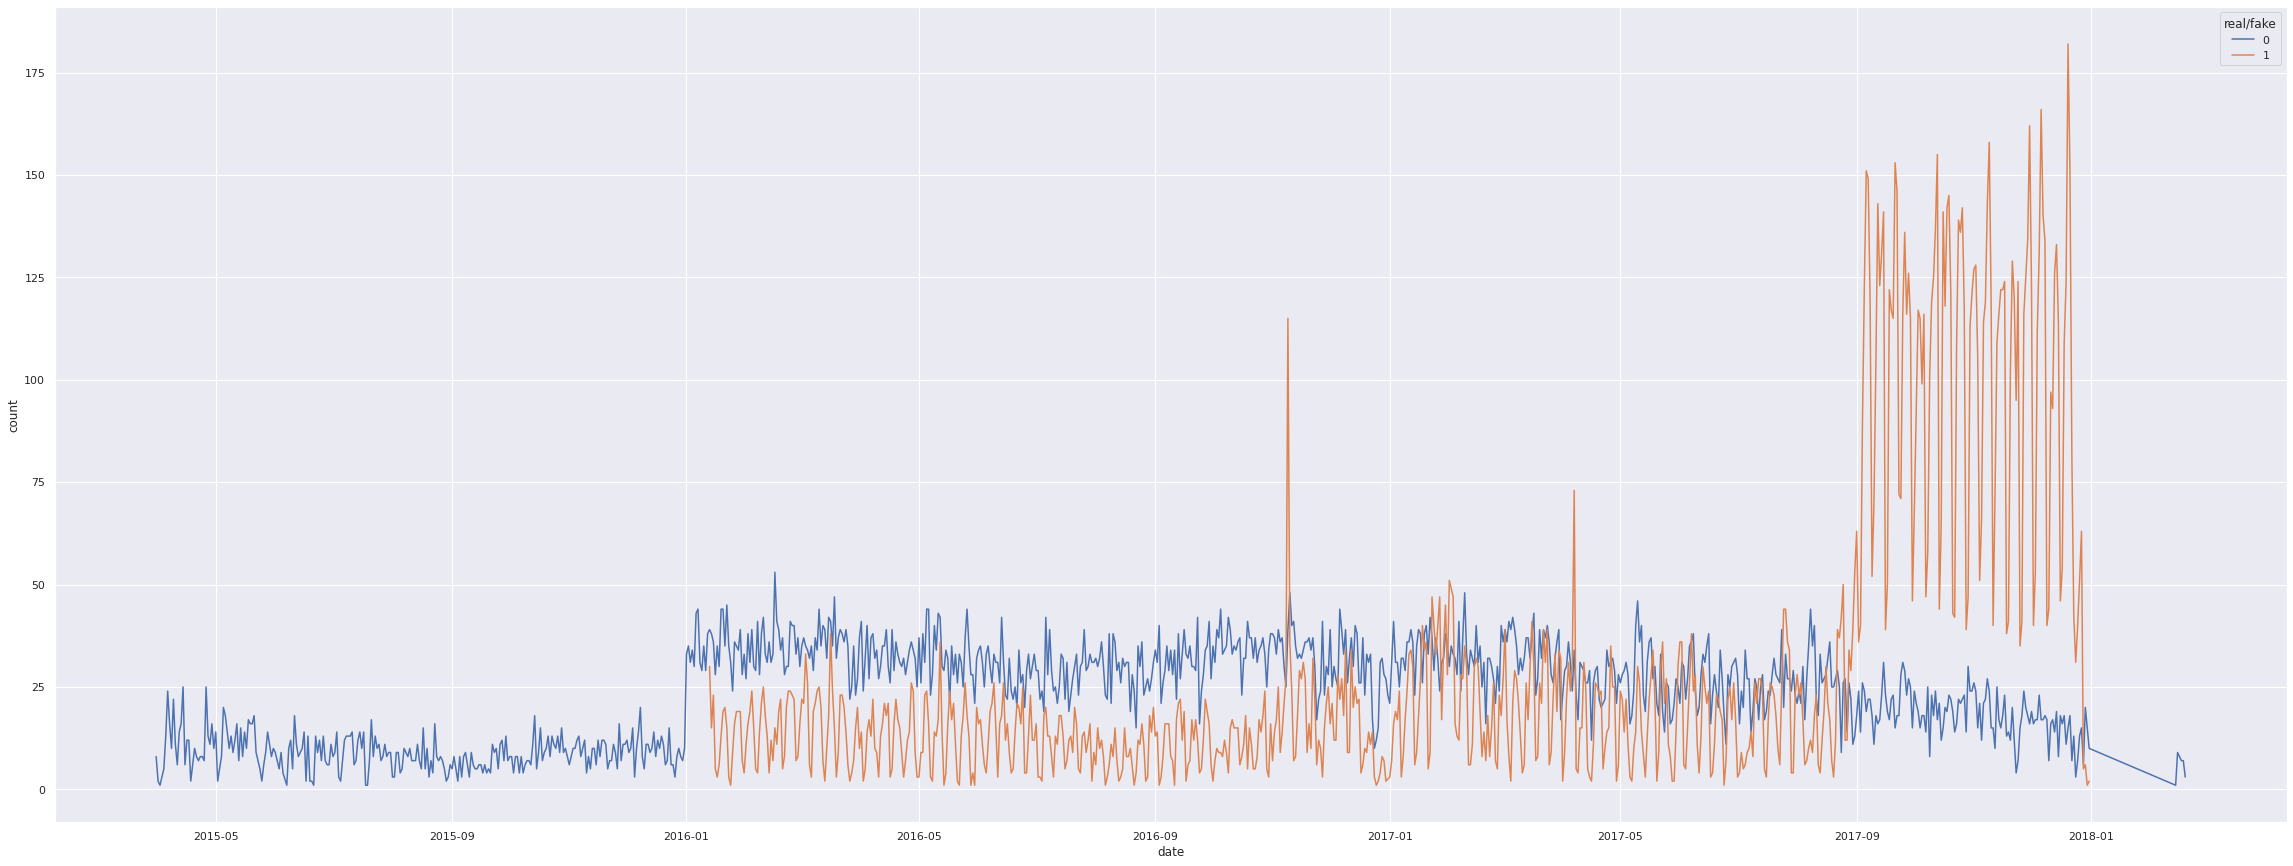

In [ ]:
sns.set(rc={'figure.figsize':(40,15)})
sns.lineplot(data=df, x='date', y='count', hue='real/fake')

In [ ]:
# resetting matplotlib to default
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# **4. Neural Networks**

## 4.1 Embeddings using Stemming

In [ ]:
# Defining the label column
label = clean_news['real/fake']

# Converting the X and y as array
text = np.asarray(embedded_docs).astype("float32")
label = np.asarray(label).astype("float32")

# Checking shape of X and y
text.shape,label.shape

((44888, 100), (44888,))

In [ ]:
# Checking how much of the data to take out for the testing dataset (validation)
holdout_split = int(len(label)*0.33)

In [ ]:
# defining train and test data
data_train = text[:holdout_split]
labels_train = label[:holdout_split]
data_test = text[holdout_split:]
labels_test = label[holdout_split:]

#### 4.1.1 Stemming

Going through a stemming process, which will group together the inflected forms of a word so they can be analyzed as a single item: the stem. 

In [ ]:
# Feature extraction 'reviews' for processing
news_features = clean_news.copy()
news_features = news_features[['content']].reset_index(drop=True)
news_features.head()

,content
0,two muslim uber drivers charged multiple sex a...
1,episode – sunday wire ‘crisis liberty’ guests ...
2,mexico cut share refined sugar sent us ministe...
3,us ally seen clinching reelection honduras vot...
4,detroit immigrant steals million medicare…owns...


In [ ]:
#Defining Stopwords
stop_words = set(stopwords.words("english"))

#Performing stemming on the review dataframe
ps = PorterStemmer()

#Splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['content'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news) # Getting the target variable

**Checking for avearge length of each Article**

Before we proceed, do we expect a Sequence model to be helpful here (versus a bag of words model)? Recall, we should check the ratio of observations in training to mean number of tokens per sample. We don't expect to get much value at all from a sequential text model in this case, because we would need a much bigger dataset (on the order of 2.5 million observations).

In [ ]:
lengths = [len(x) for x in corpus]

print(f'The average article in our data has {np.mean(lengths)} words, and we have {len(clean_news)} samples.')
print(f'The ratio of samples to average sample length is thus {len(clean_news)/np.mean(lengths)}. We are nowhere close to 1500.')

The average article in our data has 1550.030453573338 words, and we have 44888 samples.
The ratio of samples to average sample length is thus 28.95943102054425. We are nowhere close to 1500.


One-Hot encoding for the embedding layers

In [ ]:
#Setting up vocabulary size
voc_size = 12000

#One hot encoding 
onehot_repr = [one_hot(words,voc_size)for words in corpus]

Padding embedded docs

In [ ]:
#Setting sentence length
sent_length = 100

#Padding the sentences
embedded_docs = pad_sequences(onehot_repr, padding = 'pre', maxlen = sent_length)
print(embedded_docs)

[[ 3464   824 10973 ...  6881  9749  3435]
 [ 8496  1028    81 ...  4415  2238  8053]
 [    0     0     0 ...    96  6941  2457]
 ...
 [ 1464  8892  5458 ... 10610  5604  2436]
 [ 6059  4126  9235 ...  4758   615  9757]
 [ 7858  2806  5034 ...  7699   824 11238]]


##### ***4.1.2 LSTM Model***

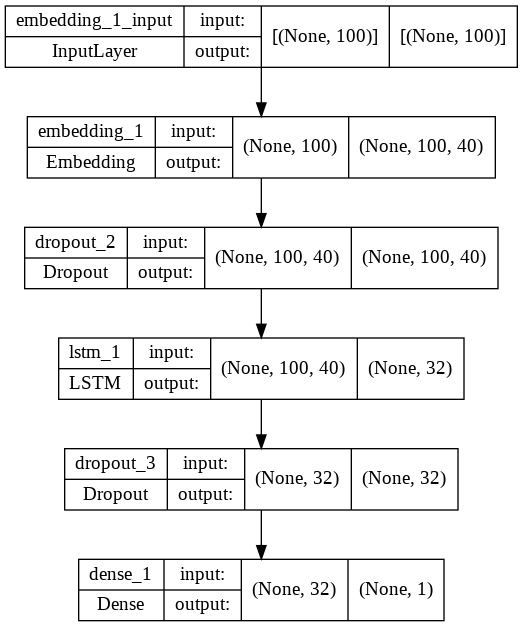

In [ ]:
# building a model
def build_model():

    embedding_vector_features=40

    model = keras.Sequential([
        keras.layers.Embedding(voc_size, embedding_vector_features, input_length=sent_length),
        keras.layers.Dropout(0.5),
        keras.layers.LSTM(32),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    return model

model = build_model()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
  # Displaying the model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 40)           480000    
                                                                 
 dropout_2 (Dropout)         (None, 100, 40)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                9344      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 489,377
Trainable params: 489,377
Non-trainable params: 0
_________________________________________________________________


Fitting the Model

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 9s 37ms/step - loss: 0.4962 - accuracy: 0.7458 - val_loss: 0.2567 - val_accuracy: 0.9114
Epoch 2/10
75/75 [==============================] - 2s 28ms/step - loss: 0.1912 - accuracy: 0.9403 - val_loss: 0.1706 - val_accuracy: 0.9415
Epoch 3/10
75/75 [==============================] - 2s 28ms/step - loss: 0.1128 - accuracy: 0.9681 - val_loss: 0.1613 - val_accuracy: 0.9415
Epoch 4/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0678 - accuracy: 0.9834 - val_loss: 0.1459 - val_accuracy: 0.9463
Epoch 5/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0471 - accuracy: 0.9889 - val_loss: 0.1473 - val_accuracy: 0.9495
Epoch 6/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0282 - accuracy: 0.9943 - val_loss: 0.1733 - val_accuracy: 0.9444
Epoch 7/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0184 - accuracy: 0.9968 - val_loss: 0.1815 - val_accuracy: 0.9430
Epoch 8/10
75

Plotting Model Performance and evaluating against Test Set

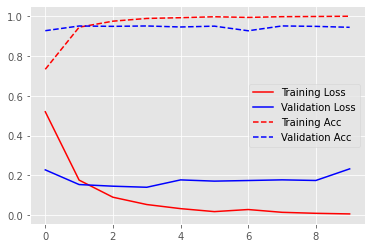

940/940 [==============================] - 8s 8ms/step - loss: 0.2220 - accuracy: 0.9468
Test acc: 0.947


In [ ]:
plt.style.use('ggplot')

plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.plot(history.history['accuracy'],c="r",linestyle="--")
plt.plot(history.history['val_accuracy'],c="b",linestyle="--")
plt.legend(['Training Loss','Validation Loss','Training Acc','Validation Acc'])
plt.show()

print(f"Test acc: {model.evaluate(data_test, labels_test)[1]:.3f}")

**Evaluation of the model**

Let's see how we do on the holdout sample though. But wait! We dropped several features from the original dataset that we used last time. We might want to incorporate those other features into another branch of the network (another input layer).

In [ ]:
test_acc = model.evaluate(data_test, labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

940/940 [==============================] - 8s 8ms/step - loss: 0.2220 - accuracy: 0.9468
The resulting model is about 94.68% accurate in the holdout sample.


##### ***4.1.3 Bidirectional LSTM***

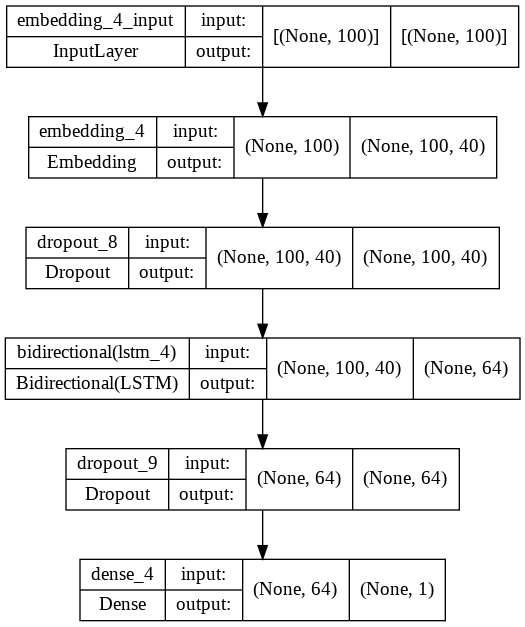

In [ ]:
# building a model
def build_model():

    embedding_vector_features=40

    model = keras.Sequential([
        keras.layers.Embedding(voc_size, embedding_vector_features, input_length=sent_length),
        keras.layers.Dropout(0.5),
        keras.layers.Bidirectional(keras.layers.LSTM(32)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

    return model

model = build_model()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 9s 66ms/step - loss: 0.5141 - accuracy: 0.7366 - val_loss: 0.2158 - val_accuracy: 0.9286
Epoch 2/10
75/75 [==============================] - 4s 53ms/step - loss: 0.1823 - accuracy: 0.9322 - val_loss: 0.1675 - val_accuracy: 0.9456
Epoch 3/10
75/75 [==============================] - 4s 54ms/step - loss: 0.1041 - accuracy: 0.9689 - val_loss: 0.1589 - val_accuracy: 0.9421
Epoch 4/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0720 - accuracy: 0.9802 - val_loss: 0.1644 - val_accuracy: 0.9490
Epoch 5/10
75/75 [==============================] - 4s 53ms/step - loss: 0.0444 - accuracy: 0.9893 - val_loss: 0.1547 - val_accuracy: 0.9500
Epoch 6/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0469 - accuracy: 0.9883 - val_loss: 0.1858 - val_accuracy: 0.9261
Epoch 7/10
75/75 [==============================] - 4s 54ms/step - loss: 0.0449 - accuracy: 0.9899 - val_loss: 0.1668 - val_accuracy: 0.9436
Epoch 8/10
75

Plotting Model Performance and evaluating against Test Set

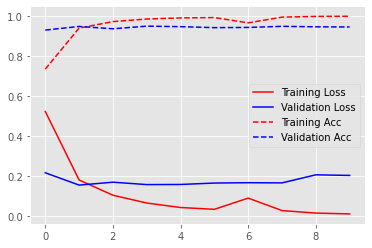

940/940 [==============================] - 14s 15ms/step - loss: 0.2001 - accuracy: 0.9448
Test acc: 0.945


In [ ]:
plt.style.use('ggplot')

plt.plot(history.history['loss'],c="r")
plt.plot(history.history['val_loss'],c="b")
plt.plot(history.history['accuracy'],c="r",linestyle="--")
plt.plot(history.history['val_accuracy'],c="b",linestyle="--")
plt.legend(['Training Loss','Validation Loss','Training Acc','Validation Acc'])
plt.show()

print(f"Test acc: {model.evaluate(data_test,labels_test)[1]:.3f}")

## 4.2 Embeddings using Text Vectorization

In [28]:
# Defining label and variables and converting them to numpy
text = clean_news['content'].to_numpy()
label = clean_news['real/fake'].to_numpy()
text_text = clean_news['text'].to_numpy()
title = clean_news['title'].to_numpy()

# Checking shape of X and y
text.shape,label.shape, text_text.shape, title.shape

((44888,), (44888,), (44888,), (44888,))

In [29]:
# Checking how much of the data to take out for the testing dataset (validation)
holdout_split = int(len(label)*0.33)

In [30]:
# defining train and test data
data_train = text[:holdout_split]
labels_train = label[:holdout_split]
data_test = text[holdout_split:]
labels_test = label[holdout_split:]

# For Multi-Layer Input
text_train = text_text[:holdout_split]
text_test = text_text[holdout_split:]
title_train = title[:holdout_split]
title_test = title[holdout_split:]

### 4.2.1 Text Vectorization

In [31]:
text_vectorization = keras.layers.TextVectorization(
    max_tokens=2000, # adding more tokens to allow for increase due to bigrams.
    output_mode="int", # This is requesting integer encodings (which means we'll have a sequence of integers)
)

text_vectorization.adapt(text)
text_vectorization.adapt(text_text)
text_vectorization.adapt(title)

Just to see what this layer is doing to our reviews... 

In [ ]:
review_text = text[0]
print(f'REVIEW TEXT: \n\n{review_text}')
review_len = len(review_text.split(' '))
print(f'REVIEW DETAILS: \n\nThe review contains roughly {review_len} words (based on white spaces).')
vectorized_review = text_vectorization(text)
print(f'It\'s vectorized (and padded) form contains {vectorized_review.shape[1]} tokens.\n') #Including the start index.
print(f'VECTOR REPRESENTATION:\n')
vectorized_review[0] # This text vectorization layer will convert a raw text vector into a sequence of integers.

REVIEW TEXT: 

hedge fund manager shuts firm explore run connecticut governor new york david stemerman winding hedge fund firm explore run governor connecticut according letter sent clients conatus capital management lp tuesday “connecticut – home family business – crisis” stemerman wrote note viewed “i deeply concerned small number people state thriving many struggling make ends meet” greenwichbased republican added “i claim answers outsider fresh perspective believe bring different approach” next election governor connecticut november news previously reported bloomberg news conatus started billion assets management followed classic fundamental stock selection strategy firm grew manage billion start assets dropped billion today according person familiar situation conatus’ main hedge fund gained percent year august person said average annual gain since inception percent according bloomberg stemerman also said letter planned give startup money new fund planned conatus consumer industry 

<tf.Tensor: shape=(4830,), dtype=int64, numpy=array([1, 1, 1, ..., 0, 0, 0])>

Before we proceed, do we expect a Sequence model to be helpful here (versus a bag of words model)? Recall, we should check the ratio of observations in training to mean number of tokens per sample. We don't expect to get much value at all from a sequential text model in this case, because we would need a much bigger dataset (on the order of 2.5 million observations). 

In [32]:
lengths = [len(x) for x in vectorized_review]

print(f'The average review in our data has {np.mean(lengths)} words, and we have {len(clean_news)} samples.')
print(f'The ratio of samples to average sample length is thus {len(clean_news)/np.mean(lengths)}. We are nowhere close to 1500.')

NameError: ignored

#### *4.2.2 Textual Embeddings*

We can pre-process the text using an Embedding layer, before going to LSTM, to 'help the model along.' The Embedding layer will be of shape Vocabular-Size x Vector Length (dimensionality of the latent space). We can feed these sequences of vectors into our LSTM. 

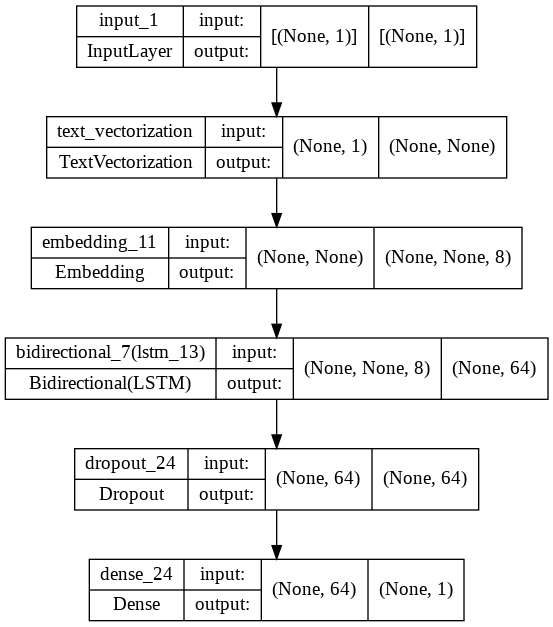

In [ ]:
def build_model_embed():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    # Truncates after 600 tokens, and pads up to 600 tokens for shorter reviews.
    # Mask zero means it will skip 0 tokens and will not pass them on.
    embedding = keras.layers.Embedding(input_dim=2000,output_dim=8,input_length=600, mask_zero=True)(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs,outputs)
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_embed = build_model_embed()

keras.utils.plot_model(model_embed, show_shapes=True)

In [ ]:
model_embed.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_11 (Embedding)    (None, None, 8)           16000     
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               10496     
 nal)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 1)                 65    

Fit the model again... 

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_embed()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 46s 493ms/step - loss: 0.5734 - accuracy: 0.6715 - val_loss: 0.4056 - val_accuracy: 0.8399
Epoch 2/10
75/75 [==============================] - 31s 419ms/step - loss: 0.2927 - accuracy: 0.8977 - val_loss: 0.2666 - val_accuracy: 0.9184
Epoch 3/10
75/75 [==============================] - 30s 407ms/step - loss: 0.2013 - accuracy: 0.9268 - val_loss: 0.2025 - val_accuracy: 0.9276
Epoch 4/10
75/75 [==============================] - 31s 411ms/step - loss: 0.1798 - accuracy: 0.9249 - val_loss: 0.1834 - val_accuracy: 0.9395
Epoch 5/10
75/75 [==============================] - 29s 389ms/step - loss: 0.2008 - accuracy: 0.9267 - val_loss: 0.1928 - val_accuracy: 0.9206
Epoch 6/10
75/75 [==============================] - 30s 404ms/step - loss: 0.1824 - accuracy: 0.9382 - val_loss: 0.1705 - val_accuracy: 0.9359
Epoch 7/10
75/75 [==============================] - 28s 379ms/step - loss: 0.1835 - accuracy: 0.9430 - val_loss: 0.1953 - val_accuracy: 0.9355

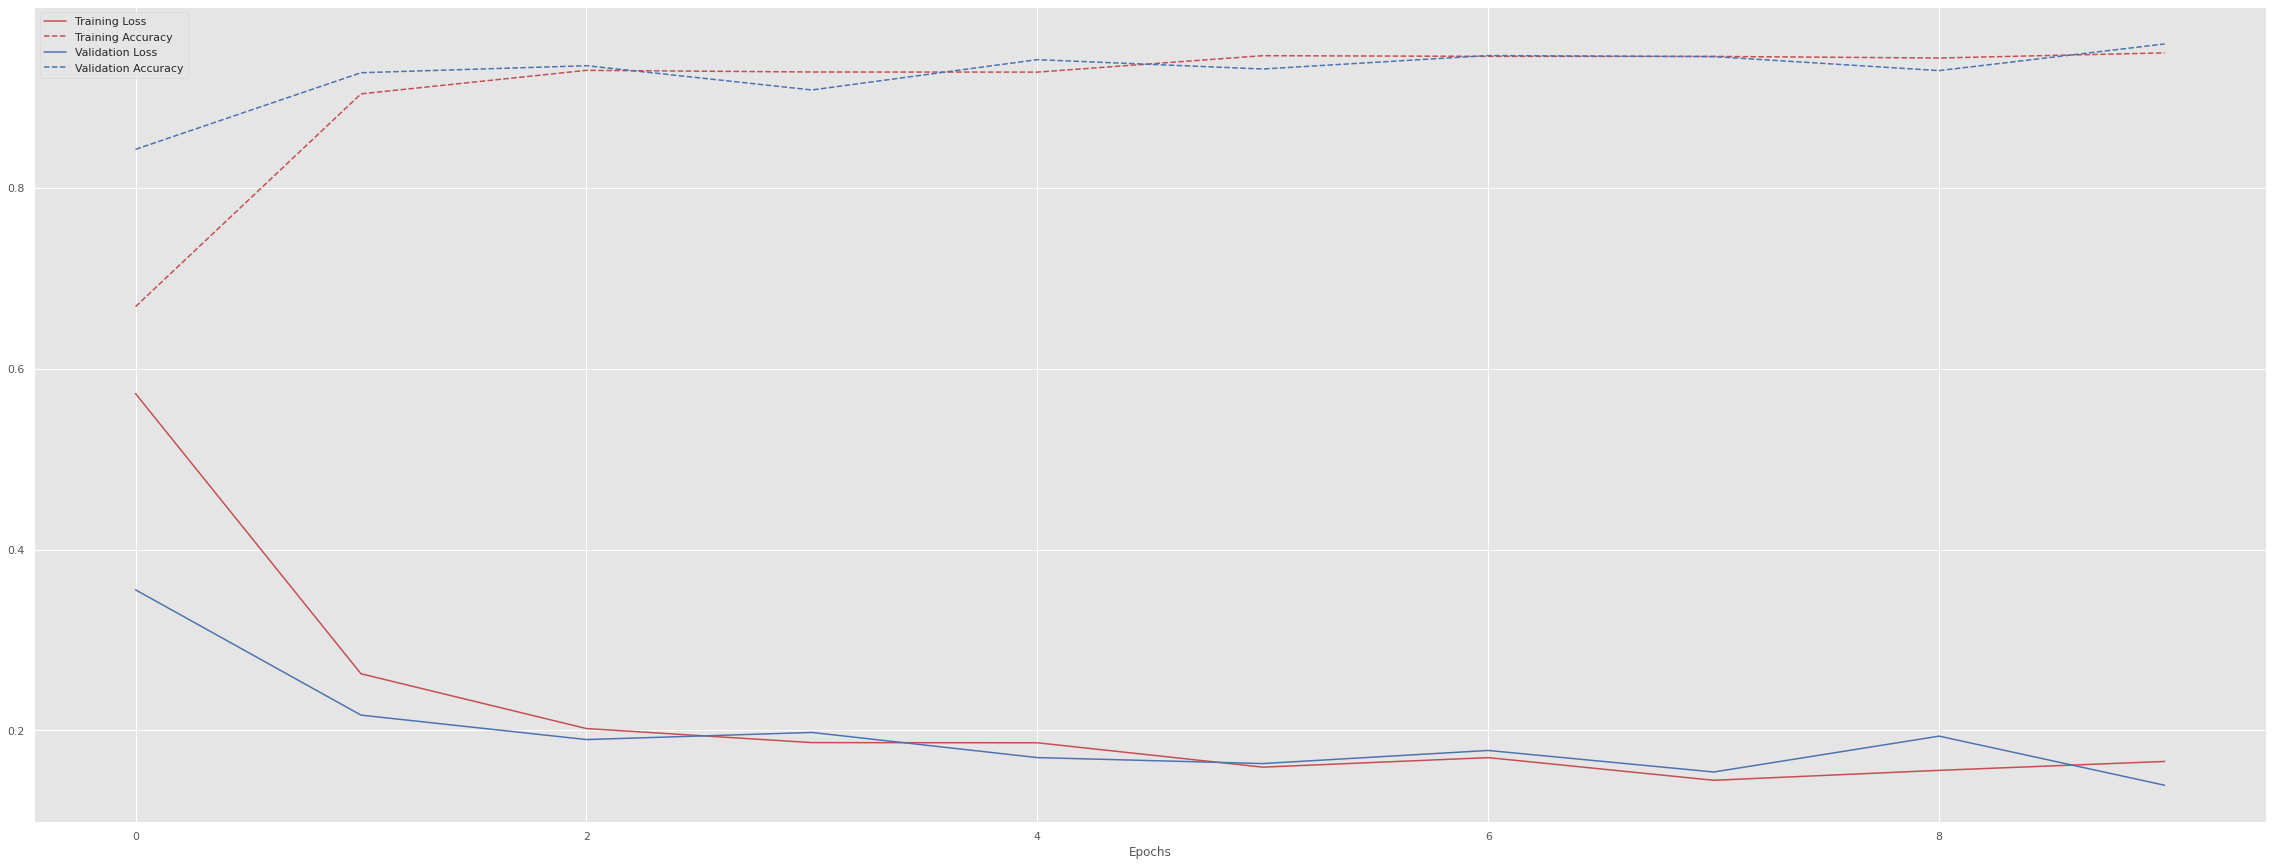

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

And we evaluate again on the test data... the custom embedding layer gets us up to 87% accuracy on the holdout data in this case.

In [ ]:
model_embed = build_model_embed()
model_embed.fit(data_train,labels_train,epochs=7,batch_size=100)

test_acc = model_embed.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/10
149/149 [==============================] - 62s 294ms/step - loss: 0.4223 - accuracy: 0.7811
Epoch 2/10
149/149 [==============================] - 39s 260ms/step - loss: 0.2935 - accuracy: 0.8701
Epoch 3/10
149/149 [==============================] - 39s 260ms/step - loss: 0.2467 - accuracy: 0.8902
Epoch 4/10
149/149 [==============================] - 39s 258ms/step - loss: 0.1457 - accuracy: 0.9431
Epoch 5/10
149/149 [==============================] - 40s 269ms/step - loss: 0.1280 - accuracy: 0.9554
Epoch 6/10
149/149 [==============================] - 39s 261ms/step - loss: 0.1146 - accuracy: 0.9600
Epoch 7/10
149/149 [==============================] - 41s 277ms/step - loss: 0.1137 - accuracy: 0.9584
Epoch 8/10
149/149 [==============================] - 39s 261ms/step - loss: 0.1050 - accuracy: 0.9640
Epoch 9/10
149/149 [==============================] - 40s 268ms/step - loss: 0.2507 - accuracy: 0.9143
Epoch 10/10
940/940 [==============================] - 96s 98ms/step - lo

#### *4.2.3 GloVe Embeddings*

Let's see if we can use pre-trained GloVe embeddings to do better here. We will download the GloVe pre-trained embeddings (these are pre-trained embeddings from Wikipedia page data collected in 2014, as well as newswire data). Note that there are also GloVe embeddings that were trained from Twitter, which might be more appropriate for social media data: https://nlp.stanford.edu/projects/glove/

In [32]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-03-13 04:49:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-03-13 04:49:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-03-13 04:49:05--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

Note that there are about 1.2 million words in the English language. GloVe contains embeddings for about one third of those words (but that is going to cover most words you will encounter in regular usage!).

In [33]:
glove_file = "glove.6B.100d.txt" 
  
embeddings_index = {} 
with open(glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1) # Split off only the first element in the row, i.e., the word, keep the remaining values as the vector.
        coefs = np.fromstring(coefs, "f", sep=" ") # Convert the set of numeric values into a numpy array, splitting elements by ' '
        embeddings_index[word] = coefs # Populate our dictionary - for this word (key), the vector representation is this vector (value).
  
glove_vec_lengths = len(coefs)

print(f"Found {len(embeddings_index)} word vectors.")
print(f"GloVe vector representations are {glove_vec_lengths} elements long.")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions


embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    #if embedding_vector is not None:
        #embedding_matrix[index] = embedding_vector

Found 400000 word vectors.
GloVe vector representations are 100 elements long.


We will now construct the Embedding matrix. This is the mapping between word tokens (integer indices) in our data and their vector representations.

In [34]:
vocabulary = text_vectorization.get_vocabulary()
print(f"Recall that our vocabulary has {len(vocabulary)} tokens in it.")
print(f"Here is the 11th word in our vocabulary: {vocabulary[13]}.") # Recall that the first two indices are reserved for 'padding' and 'UNK'

Recall that our vocabulary has 2000 tokens in it.
Here is the 11th word in our vocabulary: president.


In [35]:
embedding_dim = glove_vec_lengths # The length of the vector representations; the latent embedding space will be in 100 dimensions. 

vocabulary = text_vectorization.get_vocabulary() # From the vocabulary our text vectorizer learned from our dataset, go over every word.
word_index = dict(zip(vocabulary, range(len(vocabulary)))) # Make a dictionary, key is word to value is index.

# Instantiate a matrix of values (these will be the 'weights' in our embedding layer)
embedding_matrix = np.zeros((len(vocabulary), embedding_dim)) # It will be the 2000 tokens by 100 (length of GloVe vectors)
for word, i in word_index.items():
    if i < len(vocabulary):
        embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Here is the GloVe vector embedding for 'room'
embedding_matrix[13]

array([-0.064549  , -0.13812   ,  0.50016999,  0.41433999,  0.45831999,
       -0.048331  , -0.21651   ,  0.34987   , -0.83235002, -0.62282002,
       -0.40099001, -0.31977999,  0.42928001, -0.026035  , -0.16170999,
       -0.32512999,  0.77604002, -0.39851999, -0.67013001, -0.55875999,
       -0.39862999, -0.28143001,  0.68614   ,  0.29229   , -0.71460003,
        0.36995   , -0.45309001, -0.23193   ,  0.76915997, -0.031589  ,
        1.06029999,  1.54460001, -0.13271999,  0.33701   , -0.97561002,
        0.73616999,  0.60841   ,  0.55800003, -0.39274001,  0.1121    ,
       -1.0474    , -0.03692   ,  0.99908   , -0.044925  , -0.41185999,
        0.19605   ,  0.093281  , -0.59622997, -0.60764998, -0.47420001,
       -0.30162001, -0.70128   , -0.20055   ,  0.99519002,  0.20088001,
       -2.56360006, -0.14627001,  0.77824003,  1.49129999,  0.29723999,
       -0.12084   , -0.060082  ,  0.079881  , -0.38348001,  0.41371   ,
       -0.41284001,  0.61702001,  1.13160002, -0.047434  ,  0.28

Now we use those vector representations to instantiate our Embedding layer. Rather than 'learning' the Embedding layer's weights, we will fix the weights to be the GloVe embeddings, and make them non-trainable. 

In [36]:
embedding_layer = layers.Embedding(
    len(vocabulary), # 2000 words.
    glove_vec_lengths, # Vectors of 100 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

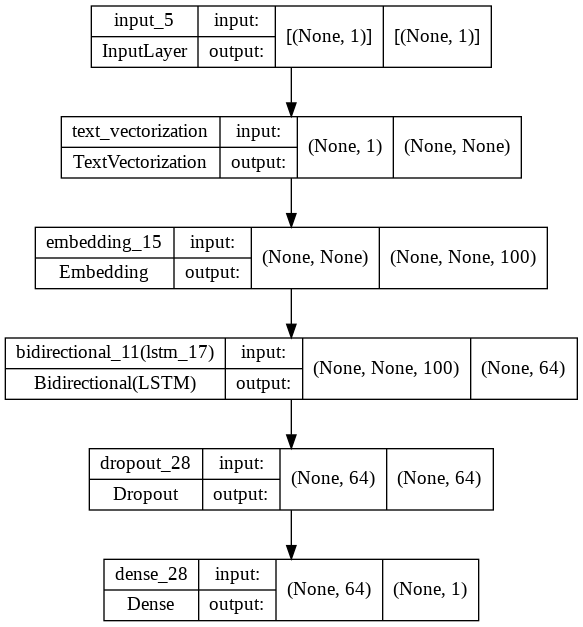

In [ ]:
def build_model_GloVe():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    embedding = embedding_layer(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    
    model = keras.Model(inputs,outputs)
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_GloVe = build_model_GloVe()

keras.utils.plot_model(model_GloVe, show_shapes=True)

And, once again, let's cross validate... 

In [44]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_GloVe()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 24s 177ms/step - loss: 0.4011 - accuracy: 0.8268 - val_loss: 0.1762 - val_accuracy: 0.9375
Epoch 2/10
75/75 [==============================] - 14s 185ms/step - loss: 0.1603 - accuracy: 0.9461 - val_loss: 0.1264 - val_accuracy: 0.9537
Epoch 3/10
75/75 [==============================] - 11s 140ms/step - loss: 0.1252 - accuracy: 0.9575 - val_loss: 0.0997 - val_accuracy: 0.9630
Epoch 4/10
75/75 [==============================] - 11s 141ms/step - loss: 0.0988 - accuracy: 0.9661 - val_loss: 0.0870 - val_accuracy: 0.9693
Epoch 5/10
75/75 [==============================] - 11s 141ms/step - loss: 0.0851 - accuracy: 0.9723 - val_loss: 0.0801 - val_accuracy: 0.9706
Epoch 6/10
75/75 [==============================] - 11s 143ms/step - loss: 0.0771 - accuracy: 0.9731 - val_loss: 0.0760 - val_accuracy: 0.9742
Epoch 7/10
75/75 [==============================] - 11s 141ms/step - loss: 0.0616 - accuracy: 0.9788 - val_loss: 0.0684 - val_accuracy: 0.9752

KeyboardInterrupt: ignored

Plotting average loss over training once again... 

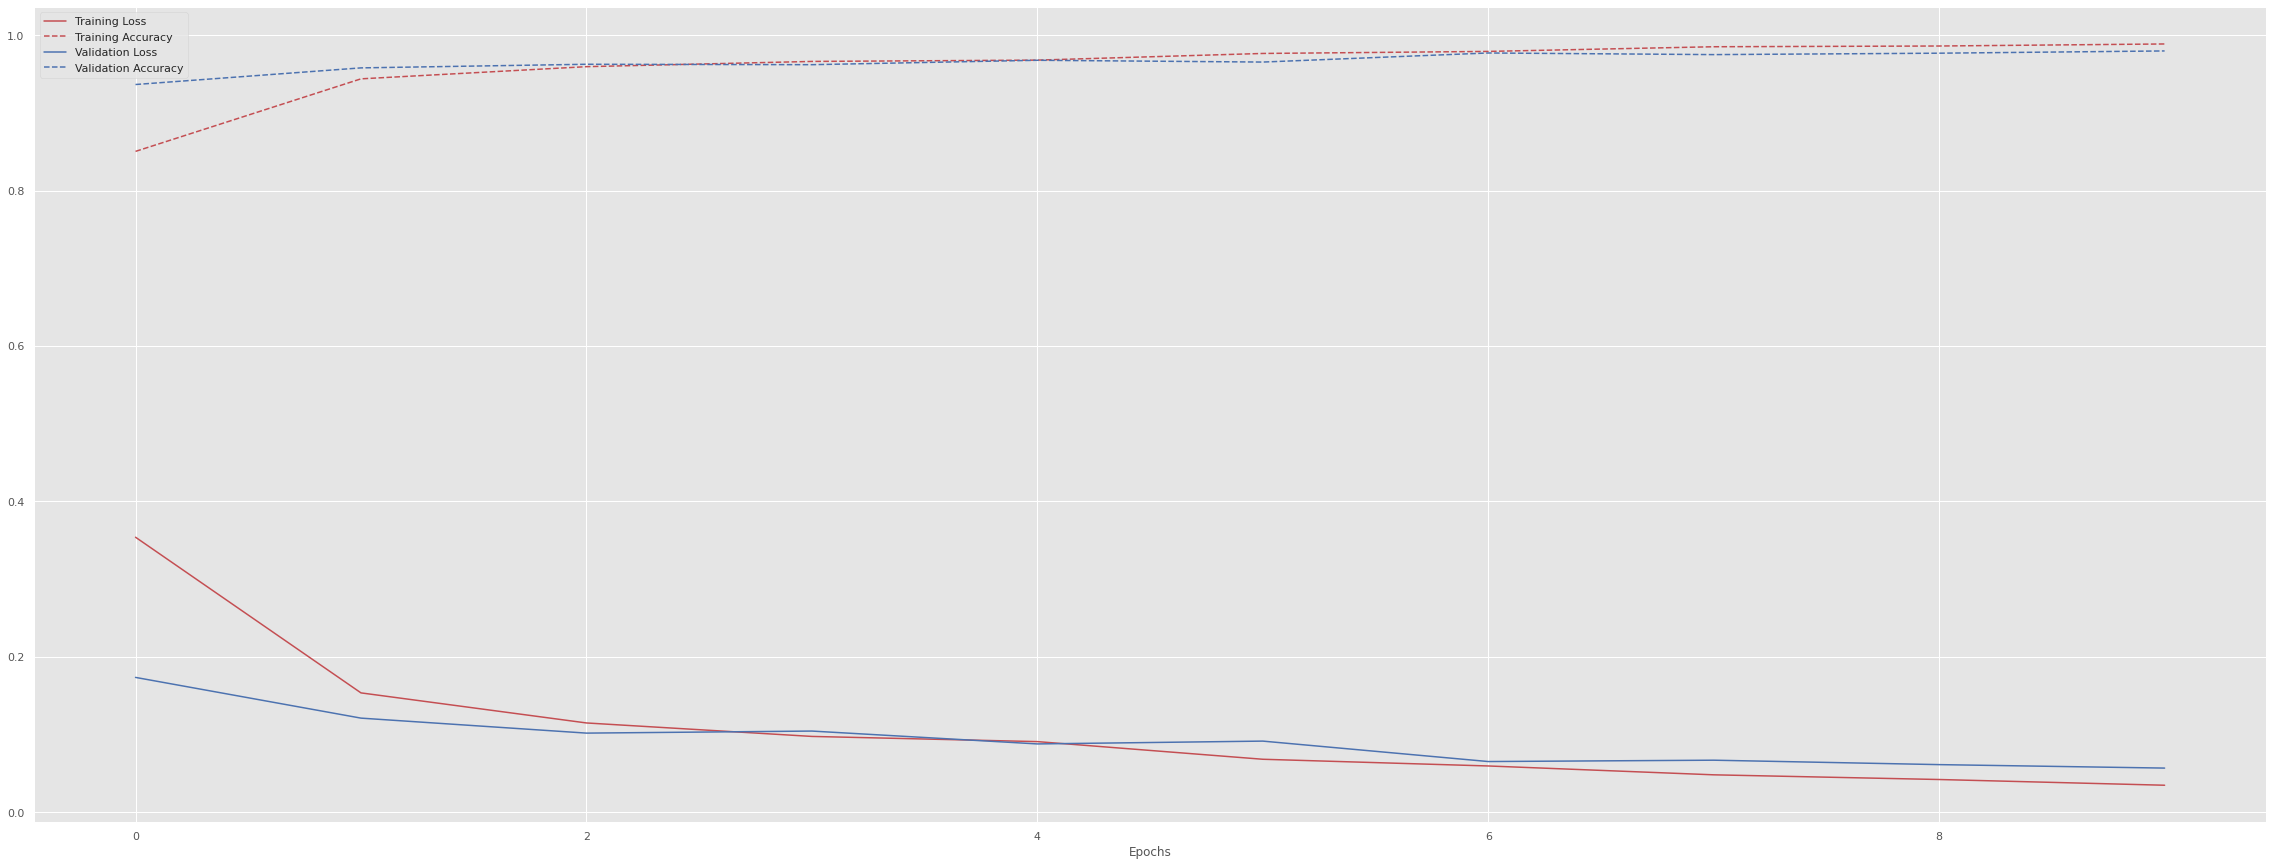

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

And, performance on the holdout data? We are actually doing substantially worse using those generic GloVe embeddings.

In [ ]:
model_glove = build_model_GloVe()
model_glove.fit(data_train,labels_train,epochs=9,batch_size=100)

test_acc = model_glove.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/9
149/149 [==============================] - 48s 262ms/step - loss: 0.2436 - accuracy: 0.9068
Epoch 2/9
149/149 [==============================] - 38s 258ms/step - loss: 0.1094 - accuracy: 0.9613
Epoch 3/9
149/149 [==============================] - 39s 262ms/step - loss: 0.0829 - accuracy: 0.9697
Epoch 4/9
149/149 [==============================] - 40s 271ms/step - loss: 0.0651 - accuracy: 0.9781
Epoch 5/9
149/149 [==============================] - 40s 268ms/step - loss: 0.0498 - accuracy: 0.9839
Epoch 6/9
149/149 [==============================] - 38s 258ms/step - loss: 0.0483 - accuracy: 0.9835
Epoch 7/9
149/149 [==============================] - 38s 256ms/step - loss: 0.0406 - accuracy: 0.9859
Epoch 8/9
149/149 [==============================] - 39s 263ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 9/9
940/940 [==============================] - 101s 103ms/step - loss: 0.0934 - accuracy: 0.9706
The resulting model is about 97.06% accurate in the holdout sample.


#### *4.2.4 Word2Vec Embeddings*

Now we will try out the word2vec pre-trained embeddings (from Wikipedia). Let's download the English language, Wikipedia 100-dimensional embeddings. Note that this can take some time because the embedding file is large. 

In [ ]:
!wget http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.pkl.bz2
!bzip2 -d enwiki_20180420_100d.pkl.bz2

--2022-03-10 19:34:15--  http://wikipedia2vec.s3.amazonaws.com/models/en/2018-04-20/enwiki_20180420_100d.pkl.bz2
Resolving wikipedia2vec.s3.amazonaws.com (wikipedia2vec.s3.amazonaws.com)... 52.219.172.77
Connecting to wikipedia2vec.s3.amazonaws.com (wikipedia2vec.s3.amazonaws.com)|52.219.172.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3514838671 (3.3G) [application/x-bzip2]
Saving to: ‘enwiki_20180420_100d.pkl.bz2’

enwiki_20180420_100 100%[===================>]   3.27G  22.4MB/s    in 2m 32s  

2022-03-10 19:36:48 (22.1 MB/s) - ‘enwiki_20180420_100d.pkl.bz2’ saved [3514838671/3514838671]



Now let's create an embedding matrix, as before, etc. Note, we can see that most of the words for which we lack embeddings are actually typos or proper nouns. We could manually fix the typos, or not (perhaps the typos are indicative of deceipt!

In [ ]:
try:
  from wikipedia2vec import Wikipedia2Vec
except ImportError as error:
  !pip install wikipedia2vec
  from wikipedia2vec import Wikipedia2Vec

from wikipedia2vec import Wikipedia2Vec

# These embeddings are 100 dimensional also.
embedding_dim = 100

wiki2vec = Wikipedia2Vec.load('enwiki_20180420_100d.pkl')

vocabulary = text_vectorization.get_vocabulary() # From the vocabulary our text vectorizer learned from our dataset, go over every word.
word_index = dict(zip(vocabulary, range(len(vocabulary)))) # Make a dictionary, key is word to value is index.
embedding_matrix = np.zeros((len(vocabulary), embedding_dim))

for word, index in word_index.items():
    try:
        embedding_matrix[index] = wiki2vec.get_word_vector(f'{word}')
    except:
        print(f'Skipping {word}, no embedding for it.')
        continue

print(f'The embedding for \'room\' is {embedding_matrix[15]}.')

     |████████████████████████████████| 1.2 MB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 20.9 MB/s 
     |████████████████████████████████| 176 kB 33.7 MB/s 
  Created wheel for wikipedia2vec: filename=wikipedia2vec-1.0.5-cp37-cp37m-linux_x86_64.whl size=4558219 sha256=f7bf18567cf2646e95259e63b051e301585a052b29e9eface51fc05f52487710
  Stored in directory: /root/.cache/pip/wheels/60/ab/8a/23eec52d43509b9caba03d0d8c006b9f827aa6c6be177ae1ca
Successfully built wikipedia2vec
Skipping , no embedding for it.
Skipping [UNK], no embedding for it.
Skipping trump’s, no embedding for it.
Skipping “i, no embedding for it.
Skipping “the, no embedding for it.
Skipping “we, no embedding for it.
Skipping obama’s, no embedding for it.
Skipping it’s, no embedding for it.
Skipping don’t, no embedding for it.
Skipping presidentelect, no embedding for it.
Skipping clinton’s, no embedding for it.
Skipping –, no embedding for it.
Skipping “this, no embedding for it.
Skipping “it, no embedding f

And, again, let's make our embedding layer... 

In [ ]:
embedding_layer = layers.Embedding(
    len(vocabulary), # 2000 words.
    100, # Vectors of 100 elements per word.
    embeddings_initializer=keras.initializers.Constant(embedding_matrix), # Initialize with fixed values from our matrix.
    trainable=False, # These are weights, but they will be frozen so they don't update during training.
    mask_zero=True, # If we have a 0 token, for padding, we don't pass it through the layer.
)

And we instantiate the model again... 

In [ ]:
def build_model_word2vec():
    inputs = keras.layers.Input(shape=(1), dtype="string") # We take our strings as input 
    processing = text_vectorization(inputs)
    
    embedding = embedding_layer(processing)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding)
    x = keras.layers.Dropout(0.5)(x)
    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    
    model = keras.Model(inputs,outputs)
    model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])
    return model

model_word2vec = build_model_word2vec()

And, let's fit the model one last time... once again, these don't help! The embeddings actually hurt. 

In [ ]:
k = 2
num_validation_samples = len(data_train) // k
num_epochs = 10
batch_sizes = 100
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

# For each validation fold, we will train a full set of epochs, and store the history. 
for fold in range(k):
    validation_data = data_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    validation_targets = labels_train[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    training_data = np.concatenate([
        data_train[:num_validation_samples * fold],
        data_train[num_validation_samples * (fold + 1):]])
    training_targets = np.concatenate([
        labels_train[:num_validation_samples * fold],
        labels_train[num_validation_samples * (fold + 1):]])
    model = build_model_word2vec()
    history = model.fit(training_data, training_targets, 
                        validation_data = (validation_data,validation_targets), 
                        epochs=num_epochs, batch_size=batch_sizes)
    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Epoch 1/10
75/75 [==============================] - 63s 476ms/step - loss: 0.4132 - accuracy: 0.8206 - val_loss: 0.2996 - val_accuracy: 0.8939
Epoch 2/10
75/75 [==============================] - 30s 394ms/step - loss: 0.2477 - accuracy: 0.9059 - val_loss: 0.4194 - val_accuracy: 0.8097
Epoch 3/10
75/75 [==============================] - 29s 396ms/step - loss: 0.2034 - accuracy: 0.9217 - val_loss: 0.2175 - val_accuracy: 0.9139
Epoch 4/10
75/75 [==============================] - 30s 402ms/step - loss: 0.1755 - accuracy: 0.9351 - val_loss: 0.1839 - val_accuracy: 0.9267
Epoch 5/10
75/75 [==============================] - 29s 388ms/step - loss: 0.1465 - accuracy: 0.9469 - val_loss: 0.2499 - val_accuracy: 0.8945
Epoch 6/10
75/75 [==============================] - 29s 392ms/step - loss: 0.1324 - accuracy: 0.9537 - val_loss: 0.1181 - val_accuracy: 0.9545
Epoch 7/10
75/75 [==============================] - 29s 380ms/step - loss: 0.1153 - accuracy: 0.9565 - val_loss: 0.1188 - val_accuracy: 0.9533

Plotting average model loss / accuracy across folds, over training.

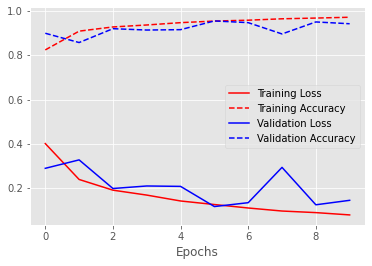

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

plt.plot(average_loss_history,c='r')
plt.plot(average_acc_history,c="r",linestyle="dashed")
plt.plot(average_val_loss_history,c='b')
plt.plot(average_val_acc_history,c='b',linestyle="dashed")
plt.xlabel("Epochs")
plt.legend(['Training Loss','Training Accuracy','Validation Loss','Validation Accuracy'])
plt.show()

And, again, performance on the holdout data, which is what ultimately matters? Again, performance of about 77%. These pre-trained embeddings are doing more harm than good in this setting.

In [ ]:
model_word2vec = build_model_word2vec()
model_word2vec.fit(data_train,labels_train,epochs=6,batch_size=100)

test_acc = model_word2vec.evaluate(data_test,labels_test)[1]*100
print(f'The resulting model is about {test_acc:.2f}% accurate in the holdout sample.')

Epoch 1/6
149/149 [==============================] - 60s 291ms/step - loss: 0.2977 - accuracy: 0.8820
Epoch 2/6
149/149 [==============================] - 40s 262ms/step - loss: 0.1630 - accuracy: 0.9400
Epoch 3/6
149/149 [==============================] - 39s 265ms/step - loss: 0.1220 - accuracy: 0.9554
Epoch 4/6
149/149 [==============================] - 40s 268ms/step - loss: 0.1000 - accuracy: 0.9638
Epoch 5/6
149/149 [==============================] - 39s 263ms/step - loss: 0.0827 - accuracy: 0.9705
Epoch 6/6
940/940 [==============================] - 101s 103ms/step - loss: 0.3633 - accuracy: 0.8755
The resulting model is about 87.55% accurate in the holdout sample.


## 4.3 Multi Input Embedding

We want to check how the model with two inputs as title and text separately will perform.

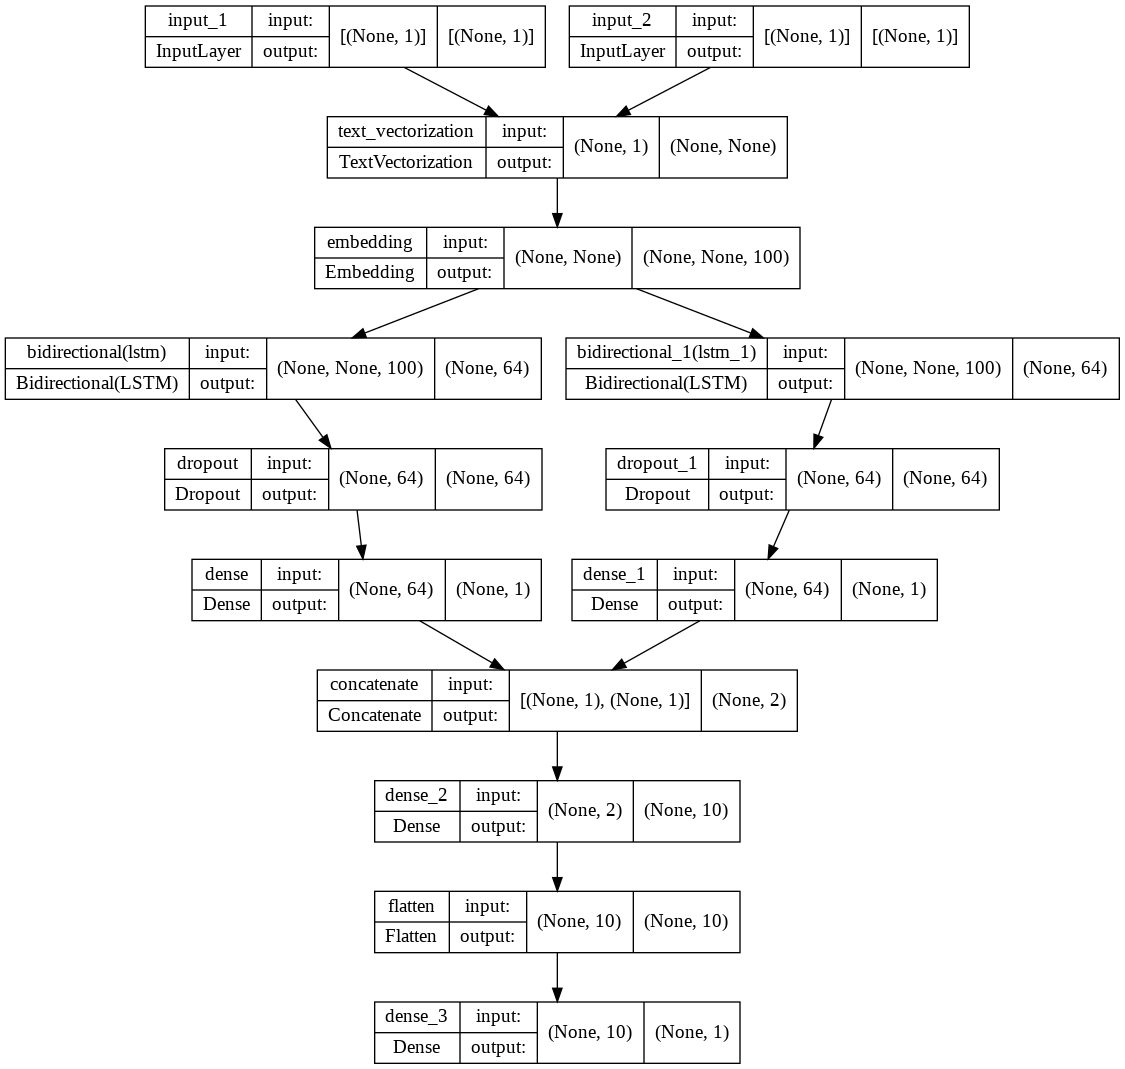

In [37]:
def multi_input_model():
    input_1 = keras.layers.Input(shape=(1), dtype="string")
    input_2 = keras.layers.Input(shape=(1), dtype="string")
    processing_1 = text_vectorization(input_1)
    processing_2 = text_vectorization(input_2)
    embedding_1 = embedding_layer(processing_1)
    embedding_2 = embedding_layer(processing_2)
    x = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding_1)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(1, activation="sigmoid")(x)
    y = keras.layers.Bidirectional(keras.layers.LSTM(32))(embedding_2)
    y = keras.layers.Dropout(0.5)(y)
    y = keras.layers.Dense(1, activation="sigmoid")(y)
    concat_layer = layers.Concatenate()([x, y])
    dense_layer_3 = Dense(10, activation='sigmoid')(concat_layer)
    dense_layer_3 = layers.Flatten()(dense_layer_3)
    output = Dense(1, activation='sigmoid')(dense_layer_3)
    model = Model(inputs=[input_1, input_2], outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

multi_input_model = multi_input_model()
plot_model(multi_input_model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)



In [63]:
multi_input_model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_26 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_27 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, None)        0           ['input_26[0][0]',               
 ization)                                                         'input_27[0][0]']               
                                                                                                  
 embedding (Embedding)          (None, None, 100)    200000      ['text_vectorization[21][0

In [39]:
folds = 2
num_val_samples = len(data_train) // folds # floor division (i.e., round down to nearest integer.)
num_epochs = 10
batch_sizes = 100
# all_train_mae_histories, all_val_mae_histories = [],[]  
all_loss_histories = []
all_val_loss_histories = []  
all_acc_histories = []
all_val_acc_histories = []

for i in range(folds): # the folds are going to be indexed 0 through 3 if k = 4
    print("Processing fold #:",i)
    
    val_data1 = text_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_data2 = title_train[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = labels_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data1 = np.concatenate(
        [text_train[:i * num_val_samples],
         text_train[(i + 1) * num_val_samples:]])

    partial_train_data2 = np.concatenate(
        [title_train[:i * num_val_samples],
         title_train[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [labels_train[:i * num_val_samples],
         labels_train[(i + 1) * num_val_samples:]])
    history = multi_input_model.fit(x=[partial_train_data1, partial_train_data2], y=partial_train_targets,
                        validation_data=([val_data1,val_data2], val_targets),
                        epochs=num_epochs, batch_size=batch_sizes)
    
    train_mae_history = history.history['acc']
    val_mae_history = history.history['val_acc']

    val_loss_history = history.history['val_loss']
    val_acc_history = history.history['val_accuracy']
    loss_history = history.history['loss']
    acc_history = history.history['accuracy']
    all_val_loss_histories.append(val_loss_history)
    all_loss_histories.append(loss_history)
    all_val_acc_histories.append(val_acc_history)
    all_acc_histories.append(acc_history)

    average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
    average_val_loss_history = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
    average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
    average_val_acc_history = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
    # all_train_mae_histories.append(train_mae_history)
    # all_val_mae_histories.append(val_mae_history)

# average_train_mae_history = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]
# average_val_mae_history = [np.mean([x[i] for x in all_val_mae_histories]) for i in range(num_epochs)]

Processing fold #: 0
Epoch 1/10
75/75 [==============================] - 241s 3s/step - loss: 0.6589 - acc: 0.6557 - val_loss: 0.6275 - val_acc: 0.8574
Epoch 2/10
75/75 [==============================] - 213s 3s/step - loss: 0.6029 - acc: 0.8908 - val_loss: 0.5781 - val_acc: 0.9074
Epoch 3/10
75/75 [==============================] - 243s 3s/step - loss: 0.5528 - acc: 0.9155 - val_loss: 0.5276 - val_acc: 0.9190
Epoch 4/10
75/75 [==============================] - 250s 3s/step - loss: 0.5011 - acc: 0.9282 - val_loss: 0.4789 - val_acc: 0.9225
Epoch 5/10
75/75 [==============================] - 257s 3s/step - loss: 0.4477 - acc: 0.9386 - val_loss: 0.4239 - val_acc: 0.9433
Epoch 6/10
75/75 [==============================] - 226s 3s/step - loss: 0.3968 - acc: 0.9533 - val_loss: 0.3774 - val_acc: 0.9382
Epoch 7/10
75/75 [==============================] - 218s 3s/step - loss: 0.3426 - acc: 0.9626 - val_loss: 0.3336 - val_acc: 0.9444
Epoch 8/10
75/75 [==============================] - 221s 3s/st

KeyError: ignored

## 4.4 Shaply (Feature Importance) 7.3 from Github

In [ ]:
# check GITHUB

# 5. Conclusion